<a href="https://colab.research.google.com/github/RaiUttamRai/Adding-a-file-in-dot-net-core-mvc/blob/main/Fashion_mnist(Multiclass_Classificaiton).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To practice multi class classification we're going to build a neural network to classify images of different items of clothings

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#the data has already been sorted into training and test for us
(train_data,train_labels),(test_data,test_labels)= fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
#show the first training example
print(f"training sample:\n{train_data}\n")
print(f"training labels:\n{train_labels}\n")

training sample:
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]

training labels:
[9 0 0 ... 3 0 5]



In [10]:
#check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

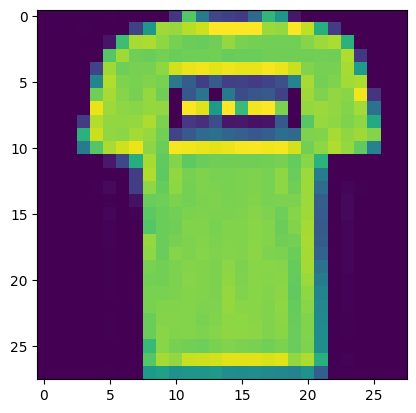

In [16]:
#plot single image/sample
import matplotlib.pyplot as plt
plt.imshow(train_data[1])

In [21]:
#check out sample labels
train_labels[7]

np.uint8(2)

In [24]:
#create a small list so we can index onto our trainng labels so they are human readable form
class_name=["T-shirt/top","Trouser","	Pullover","	Dress","	Coat","	Sandal","Shirt","Sneaker","	Bag","	Ankle boot"]
len(class_name)

10

Text(0.5, 1.0, '\tDress')

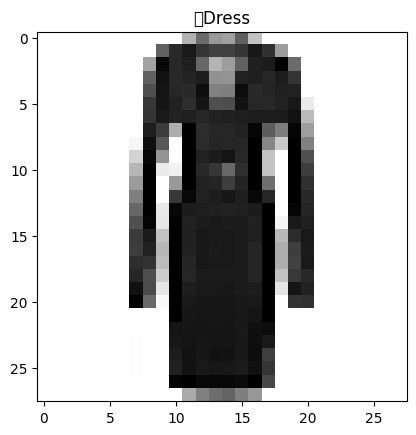

In [31]:
#plot an example image and its label
index_of_choice=20101
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

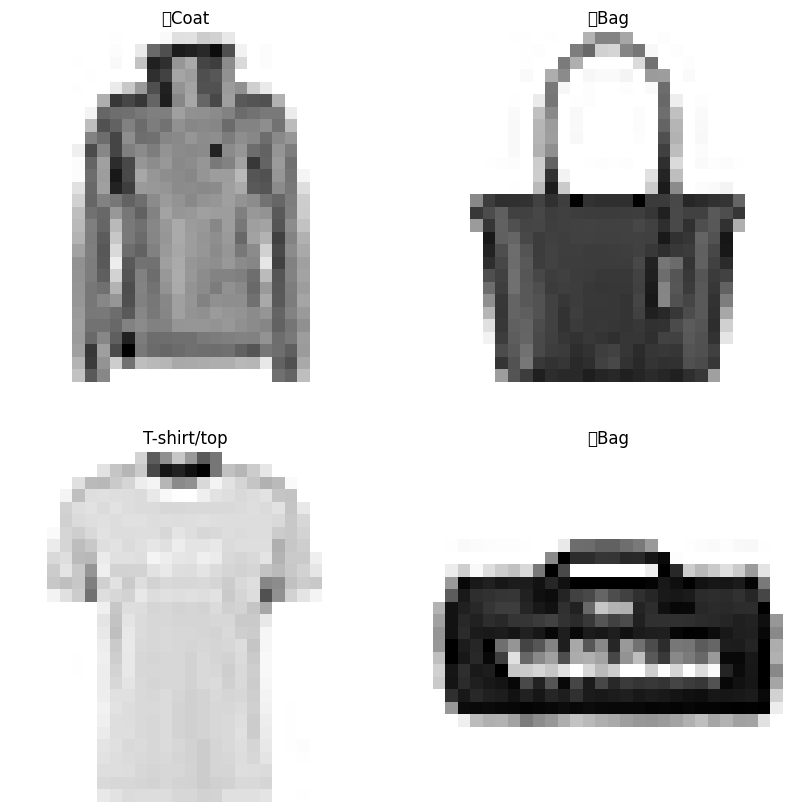

In [36]:
#plot multiple random image of fashion mnist
import random
plt.figure(figsize=(10,10))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)